# Tutorial 3 - Python For Data Analysis 🐍
---
## 📈 Matplotlib & Seaborn 📉

### *Table of Contents*


  - [Exercise 4](#exercise-4) : Traffic accidents - Seaborn


<a name="exercise-4">

### Exercise 4 : Traffic Accidents - Seaborn
---

In EDA (Exploratory Data Analysis), we rarely use matplotlib directly. We use it for highly customized visualizations. For quick plots, we can use pandas built-in plots or use external libraries, like Seaborn.

We can also use more developed libraries like plotly or bokeh, allowing to create interactive visualizations and entire dashboards.

Get the dataframe we used in the previous TP. Don’t forget to add a title, x labels, y labels to every plot you make! Visualizations are used to communicate with people who are nontech- nical and/or who have never seen your data.


https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 1) Use the dataframe you created on 2.25, representing the relationship between ‘moving obstacles’ and ‘transport vehicles’. Create a dataframe using this data, marking the correlation between each variable in the heatmap. Add a title and change the style of this plot. Here’s an example of the expected output:

In [100]:
df = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/be2191a6-a7cd-446f-a9fc-8d698688eb9e")
df.columns = ["Num_Acc", "sens_de_Circulation", "catV","nb_occupants", "obstacle_fixe", "obstacle_mobile", "choc", "manoeuvre" , "num_vehicule" ]
df_heatmap = df.groupby(["catV","obstacle_mobile"])["nb_occupants"].sum().reset_index()
df_heatmap = df_heatmap[df_heatmap["catV"].isin([37, 38 ,39 ,40])]
df_heatmap["catV"] = df_heatmap["catV"].replace([37, 38 ,39 ,40], ["Autobus", "Autocar", "Train", "Tramway"])
df_heatmap["obstacle_mobile"] = df_heatmap["obstacle_mobile"].replace([0, 1 ,2, 4, 9], ["Aucun", "Piéton", "Vehicule", "Véhicule sur rail", "Autre"])

In [101]:
df_heatmap = df_heatmap.pivot(index="catV", columns="obstacle_mobile", values="nb_occupants")

<Axes: xlabel='obstacle_mobile', ylabel='catV'>

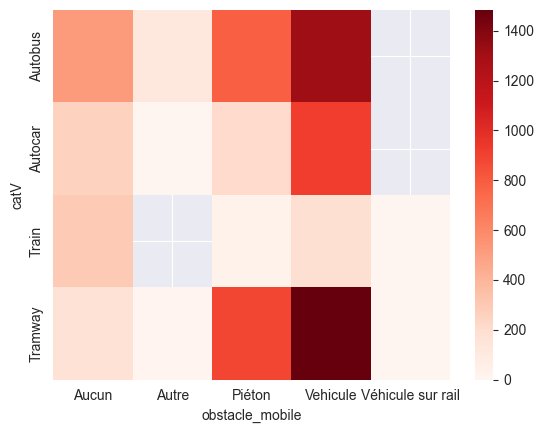

In [102]:
sns.heatmap(df_heatmap, cmap='Reds')

#### 2) Create a pie chart representing the frequency of ‘accident numbers’ by ‘type of mov- ing obstacle’

In [103]:
df_pie = df.groupby(["obstacle_mobile"])["Num_Acc"].count().reset_index()
df_pie = df_pie[df_pie["obstacle_mobile"].isin([0, 1 ,2, 4, 9])]
df_pie["obstacle_mobile"] = df_pie["obstacle_mobile"].replace([0, 1 ,2, 4, 9], ["Aucun", "Piéton", "Vehicule", "Véhicule sur rail", "Autre"])

([<matplotlib.patches.Wedge at 0x22a5cc87ad0>,
 [Text(0.9017854196681706, 0.6299071811575906, 'Aucun'),
  Text(0.012969004309430168, 1.0999235450372096, 'Piéton'),
  Text(-0.6750132952941879, -0.8685373055753459, 'Vehicule'),
  Text(1.096894397280011, -0.08259952309621191, 'Véhicule sur rail'),
  Text(1.099287098601634, -0.039596399432290035, 'Autre')],
 [Text(0.49188295618263844, 0.3435857351768675, '19.4%'),
  Text(0.007074002350598273, 0.5999582972930233, '10.8%'),
  Text(-0.36818907016046604, -0.4737476212229159, '68.5%'),
  Text(0.5983060348800059, -0.045054285325206486, '0.1%'),
  Text(0.5996111446918003, -0.02159803605397638, '1.1%')])

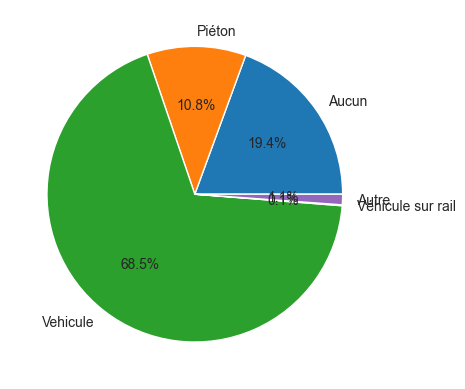

In [104]:
plt.pie(df_pie["Num_Acc"], labels=df_pie["obstacle_mobile"], autopct='%1.1f%%')

#### 3) Modify the previous plot to have the frequency of the single accident numbers

In [105]:
df_pie_second = df.groupby(["obstacle_mobile"])["Num_Acc"].unique().apply(lambda x: len(x)).reset_index()
df_pie_second = df_pie_second[df_pie_second["obstacle_mobile"].isin([0, 1 ,2, 4, 9])]
df_pie_second["obstacle_mobile"] = df_pie_second["obstacle_mobile"].replace([0, 1 ,2, 4, 9], ["Aucun", "Piéton", "Vehicule", "Véhicule sur rail", "Autre"])

([<matplotlib.patches.Wedge at 0x22a5cce4cd0>,
 [Text(0.7261379994019076, 0.8262709034115842, 'Aucun'),
  Text(-0.6761975968018021, 0.8676155888868454, 'Piéton'),
  Text(-0.2681813247682569, -1.0668077507430958, 'Vehicule'),
  Text(1.0930892241825667, -0.12310949588051598, 'Véhicule sur rail'),
  Text(1.0984177493597604, -0.058978367995722716, 'Autre')],
 [Text(0.3960752724010405, 0.4506932200426822, '27.1%'),
  Text(-0.36883505280098294, 0.473244866665552, '17.0%'),
  Text(-0.14628072260086739, -0.5818951367689612, '54.1%'),
  Text(0.5962304859177635, -0.06715063411664507, '0.2%'),
  Text(0.5991369541962329, -0.032170018906757844, '1.7%')])

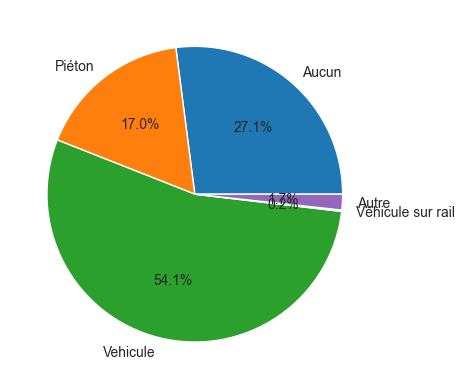

In [106]:
plt.pie(df_pie_second["Num_Acc"], labels=df_pie_second["obstacle_mobile"], autopct='%1.1f%%')

#### 4) Calculate the ‘'number of accidents’ per ‘fixed obstacle’. Visualize the result in a hori- zontal bar chart.

<Axes: xlabel='Num_Acc', ylabel='obstacle_fixe'>

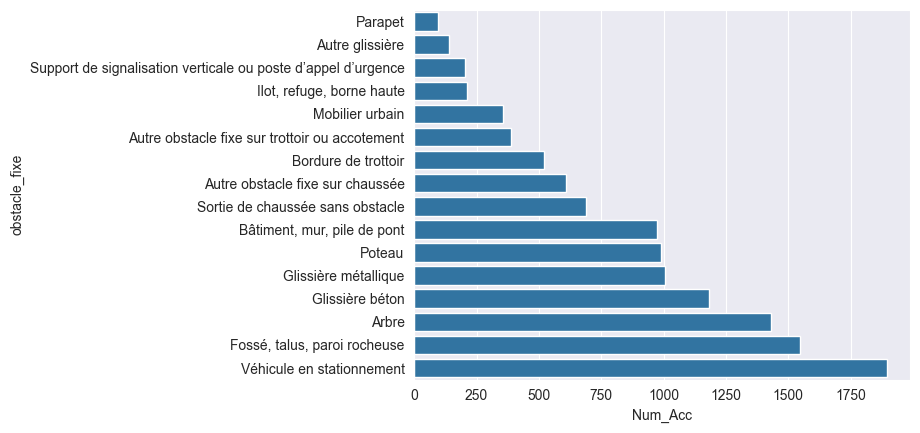

In [107]:
df_horizontal = df.groupby(["obstacle_fixe"])["Num_Acc"].nunique().reset_index().sort_values(by="Num_Acc")
df_horizontal = df_horizontal[df_horizontal["obstacle_fixe"].isin([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])]
df_horizontal["obstacle_fixe"] = df_horizontal["obstacle_fixe"].replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], ["Véhicule en stationnement","Arbre","Glissière métallique","Glissière béton","Autre glissière","Bâtiment, mur, pile de pont","Support de signalisation verticale ou poste d’appel d’urgence","Poteau","Mobilier urbain","Parapet","Ilot, refuge, borne haute","Bordure de trottoir","Fossé, talus, paroi rocheuse","Autre obstacle fixe sur chaussée","Autre obstacle fixe sur trottoir ou accotement","Sortie de chaussée sans obstacle","Buse – tête d’aqueduc" ])
sns.barplot(data=df_horizontal, x="Num_Acc", y="obstacle_fixe")

#### 5) Zoom in on the lower part of this graph, keep values less than 1500 only (and if their- values are higher, place it at the maximum of the plot)

[(0.0, 1500.0)]

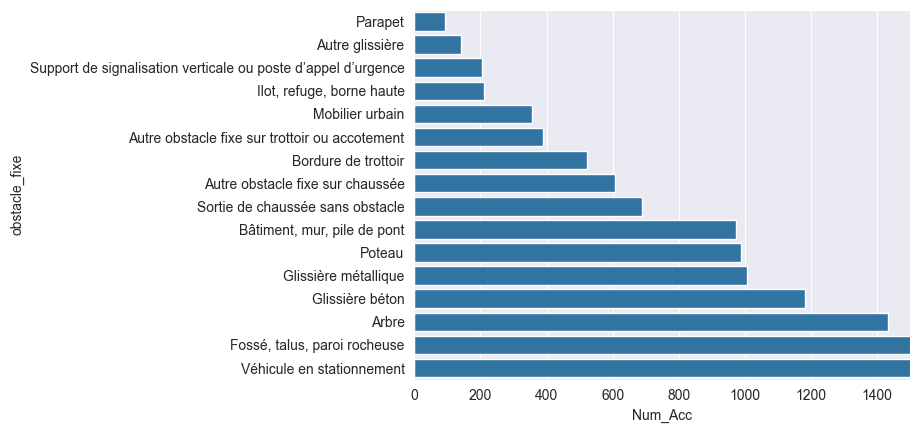

In [108]:
ax = sns.barplot(data=df_horizontal, x="Num_Acc", y="obstacle_fixe")
ax.set(xlim=(0, 1500))

6) Zoom in to the upper part of this graph, keep values greater than 1500 only (and if their values are lower, remove them from the graph)

[(1500.0, 2000.0)]

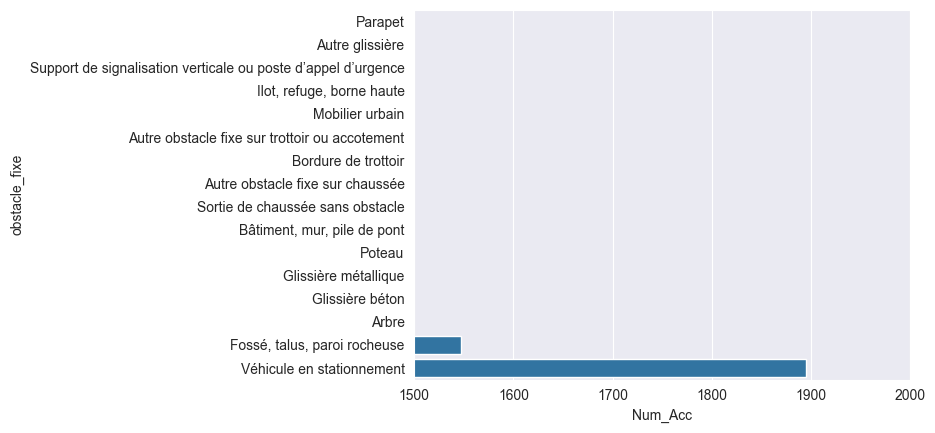

In [109]:
ax = sns.barplot(data=df_horizontal, x="Num_Acc", y="obstacle_fixe")
ax.set(xlim=(1500, 2000))

### Exercise 5 : (TODO)
---

Read the file named characteristics_2016.csv containing the characteristics of each accident. Do not hesitate to go back to the documentation if necessary to better understand the columns

Documentation : https://www.data.gouv.fr/fr/datasets/r/6cade01c-f69d-4779-b0a4-20606069888f

File path: https://www.data.gouv.fr/fr/datasets/r/96aadc9f-0b55-4e9a-a70e-c627ed97e6f7

#### 1) Create a scatter plot using long and lat columns. Can you recognize the map of France? Maybe by zooming in a bit?

[(4000000.0, 5200000.0)]

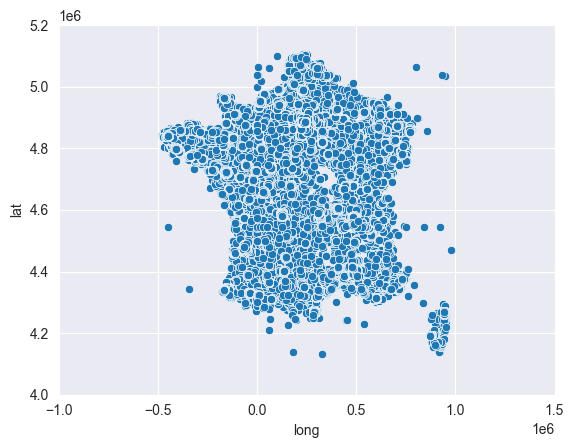

In [110]:
data = pd.read_csv("https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20170915-153739/caracteristiques_2016.csv", encoding="latin-1")
data_scatter = data[["long", "lat"]]
ax = sns.scatterplot(data=data_scatter, x="long", y="lat")
ax.set(xlim=(-1e6, 1.5e6))
ax.set(ylim=(4e6, 5.2e6))

In [111]:
data.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,16,2,1,1445,1,2,1,8,3.0,5,"46, rue Sonneville",M,0.0,0.0,590
1,201600000002,16,3,16,1800,1,2,6,1,6.0,5,1a rue du cimetière,M,0.0,0.0,590
2,201600000003,16,7,13,1900,1,1,1,1,6.0,11,NaN,M,0.0,0.0,590
3,201600000004,16,8,15,1930,2,2,1,7,3.0,477,52 rue victor hugo,M,0.0,0.0,590
4,201600000005,16,12,23,1100,1,2,3,1,3.0,11,rue Joliot curie,M,0.0,0.0,590


#### 2) Create a time series graph, representing the evolution of traffic accidents over time. Be specific in your graph (the more details you can provide, the better it will be), while being clear to someone who is seeing it for the first time

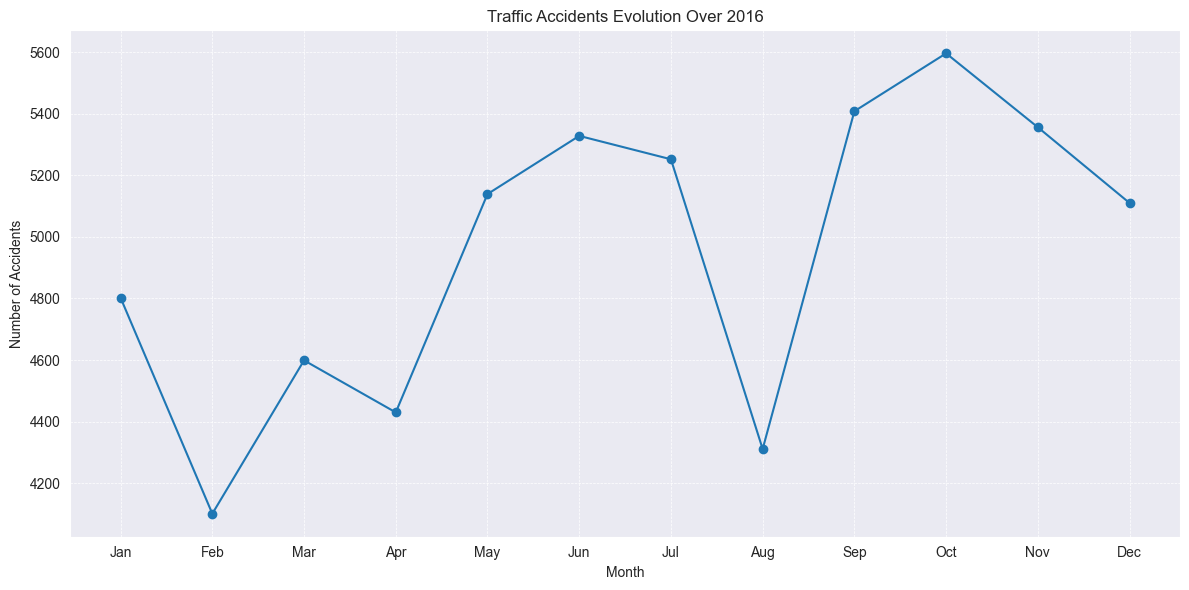

In [112]:
monthly_accidents = data.groupby('mois').size()

plt.figure(figsize=(12, 6))
monthly_accidents.plot(kind='line', marker='o')
plt.title('Traffic Accidents Evolution Over 2016')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

#### 3) Count and visualize the number of accidents by department. Show the 10 most dan- gerous departments.

In [113]:
accidents_by_department = data.groupby('dep').size().reset_index(name='num_accidents')
top_departments = accidents_by_department.sort_values(by='num_accidents', ascending=False).head(10)
top_departments['dep'] = top_departments['dep'].replace([750, 130, 930, 920 ,940, 690,330,910,60,590], ["Paris", "Bouches-du-Rhône", "Seine-Saint-Denis", "Hauts-de-Seine", "Val-de-Marne", "Rhone", "Gironde", "Essonne", "Oise", "Nord"])

In [114]:
top_departments

,dep,num_accidents
75,Paris,6466
12,Bouches-du-Rhône,4110
93,Seine-Saint-Denis,3031
92,Hauts-de-Seine,2873
94,Val-de-Marne,2721
69,Rhone,2026
33,Gironde,1641
91,Essonne,1419
5,Oise,1409
59,Nord,1181


C:\Users\alexs\AppData\Local\Temp\ipykernel_25436\676049765.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_departments, x='dep', y='num_accidents', palette='viridis')


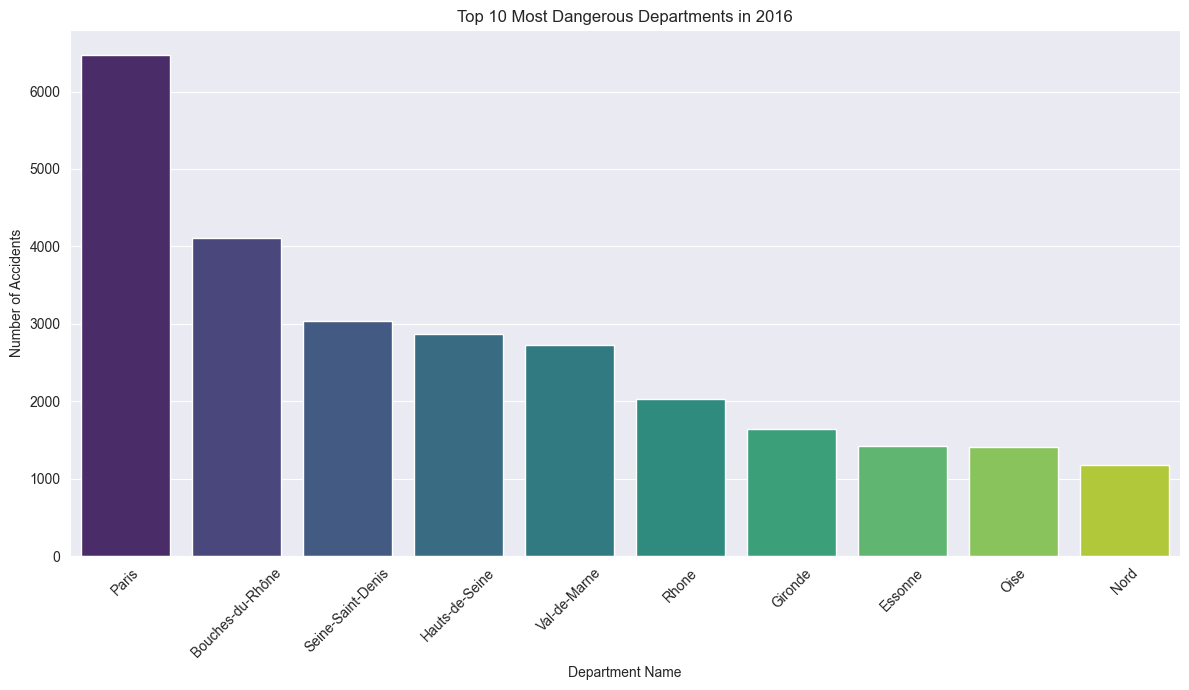

In [115]:
plt.figure(figsize=(12, 7))
sns.barplot(data=top_departments, x='dep', y='num_accidents', palette='viridis')
plt.title('Top 10 Most Dangerous Departments in 2016')
plt.xlabel('Department Name')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 4) Create a new column having an explicit weather label. Analyze this new column for more information on accidents. When do they occur?


In [116]:
weather_mapping = {
    -1: 'Non renseigné',
    1: 'Normale',
    2: 'Pluie légère',
    3: 'Pluie forte',
    4: 'Neige - grêle',
    5: 'Brouillard - fumée',
    6: 'Vent fort - tempête',
    7: 'Temps éblouissant',
    8: 'Temps couvert',
    9: 'Autre'
}
data['weather_label'] = data['atm'].map(weather_mapping)

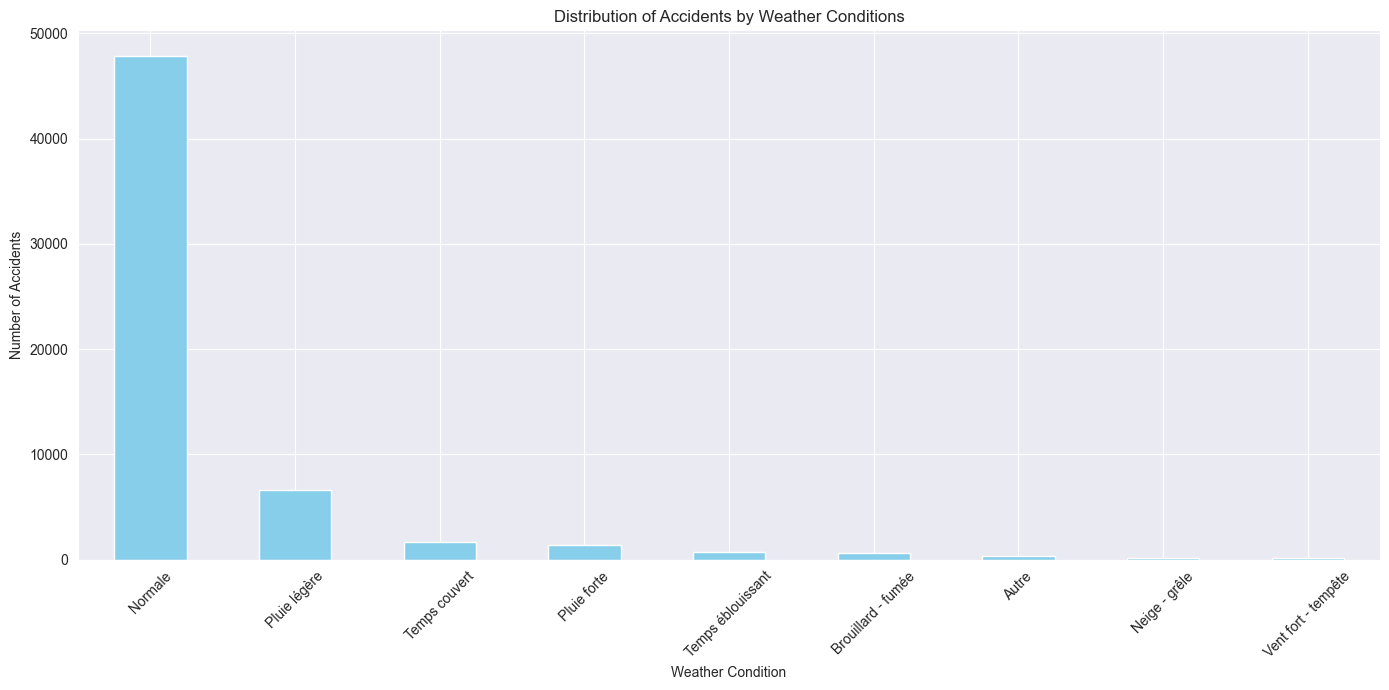

In [117]:
weather_accidents = data['weather_label'].value_counts()

plt.figure(figsize=(14, 7))
weather_accidents.plot(kind='bar', color='skyblue')
plt.title('Distribution of Accidents by Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 5) Create two new columns, the first will contain the hour of the accident, the second will contain the minute. Which hour is the most dangerous for drivers?

In [118]:
data['hour'] = data['hrmn'] // 100
data['minute'] = data['hrmn'] % 100

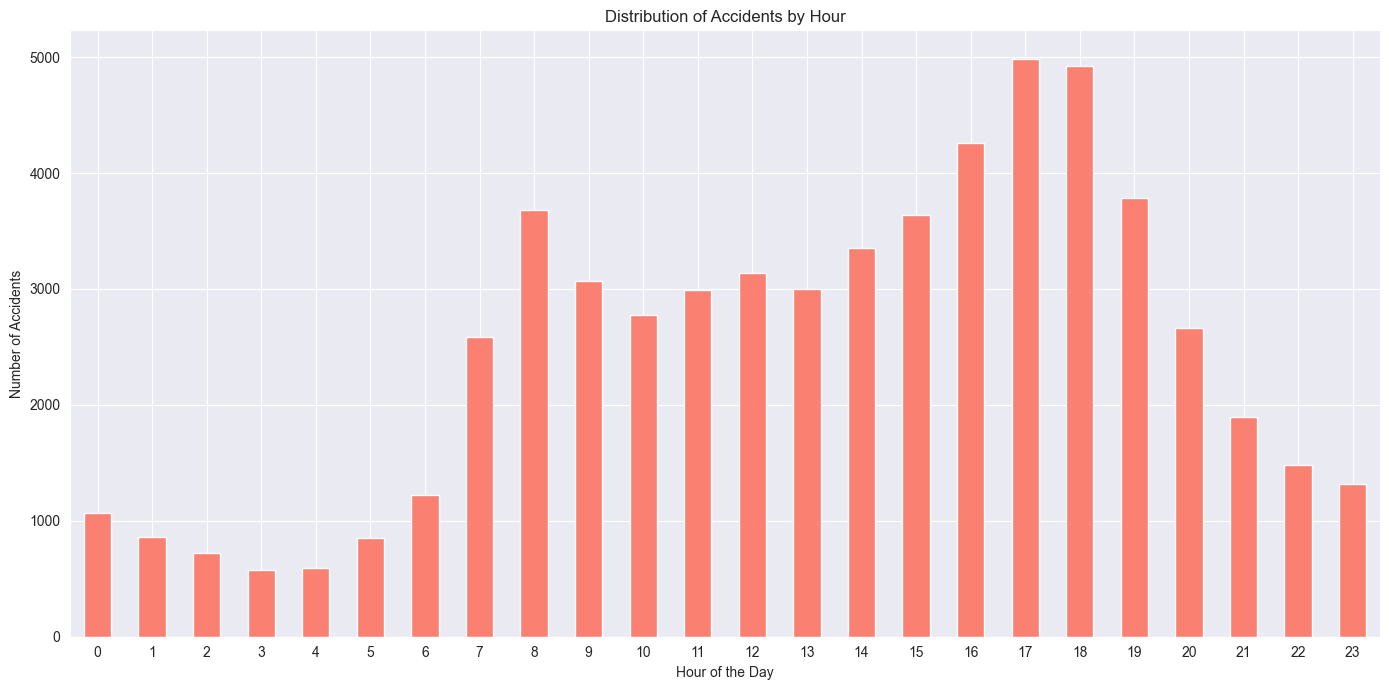

In [119]:
hourly_accidents = data['hour'].value_counts().sort_index()

# Visualizing the distribution of accidents by hour
plt.figure(figsize=(14, 7))
hourly_accidents.plot(kind='bar', color='salmon')
plt.title('Distribution of Accidents by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### 6) Analyze the most dangerous moment for each department. Does a specific moment stand out?

In [120]:
department_hourly_accidents = data.groupby(['dep', 'hour']).size().reset_index(name='num_accidents')

most_dangerous_hour_per_department = department_hourly_accidents.loc[department_hourly_accidents.groupby('dep')['num_accidents'].idxmax()]


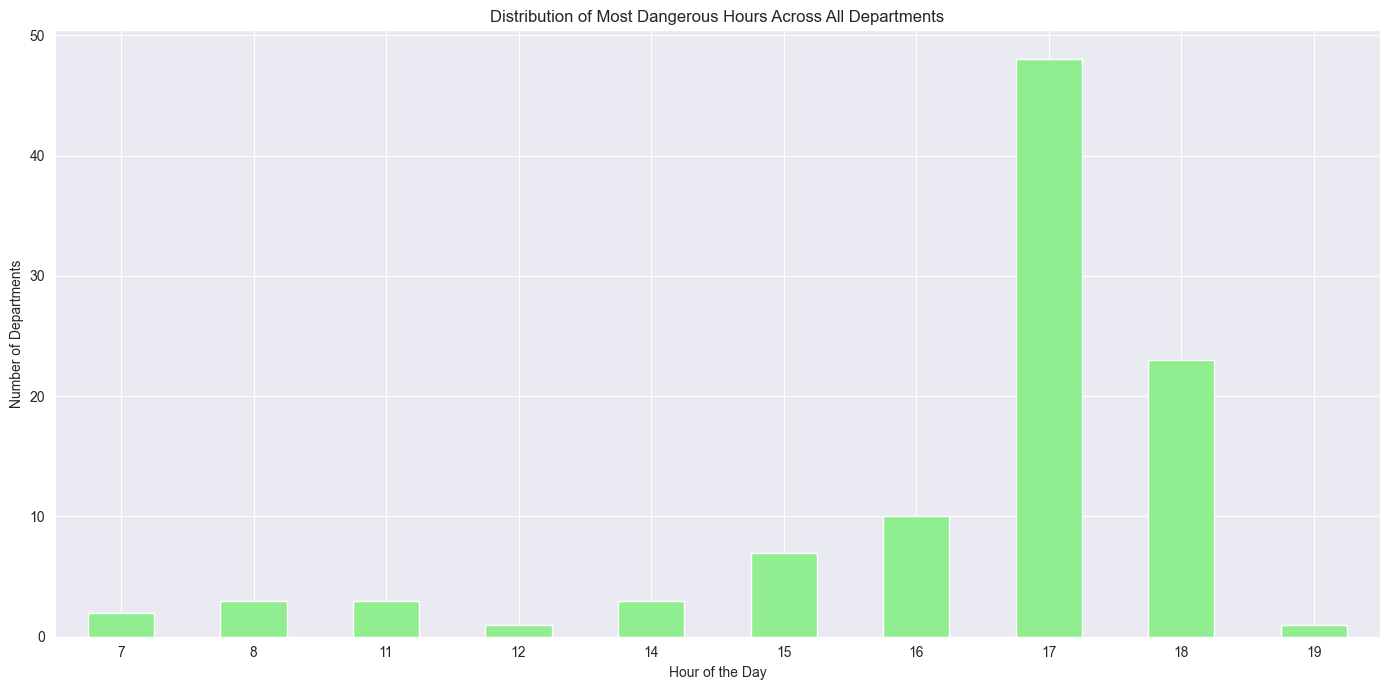

In [121]:
plt.figure(figsize=(14, 7))
most_dangerous_hour_per_department['hour'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Most Dangerous Hours Across All Departments')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Departments')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### 7) Does Ile-de-France have more accidents than in the provinces? Create a new column and analyze the behavior in each of these two groups (Ile-de-France vs provinces). Remember to also analyze the time of day, the weather, etc.

In [122]:
ile_de_france_deps = [750, 770, 780, 910, 920, 930, 940, 950]
data['region_type'] = ['Ile-de-France' if dep in ile_de_france_deps else 'Provinces' for dep in data['dep']]

region_distribution = data['region_type'].value_counts()
region_distribution

region_type
Provinces        40110
Ile-de-France    19322
Name: count, dtype: int64

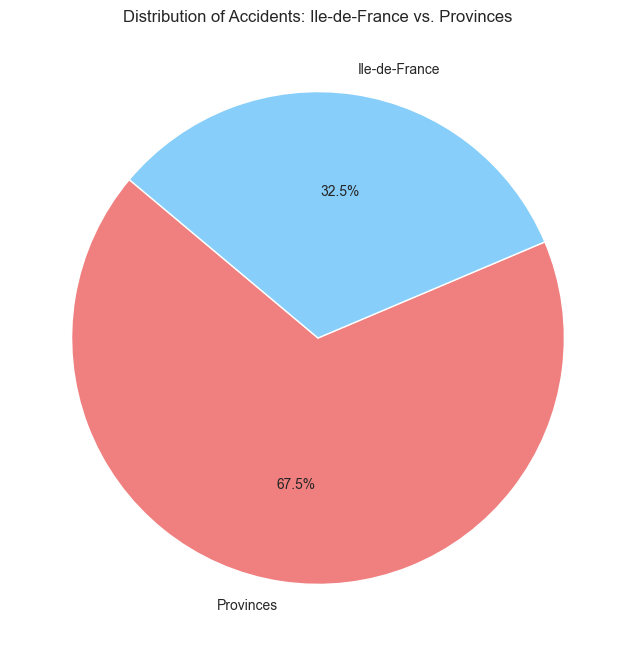

In [123]:
region_distribution = data['region_type'].value_counts()

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
region_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Accidents: Ile-de-France vs. Provinces')
plt.ylabel('')
plt.show()

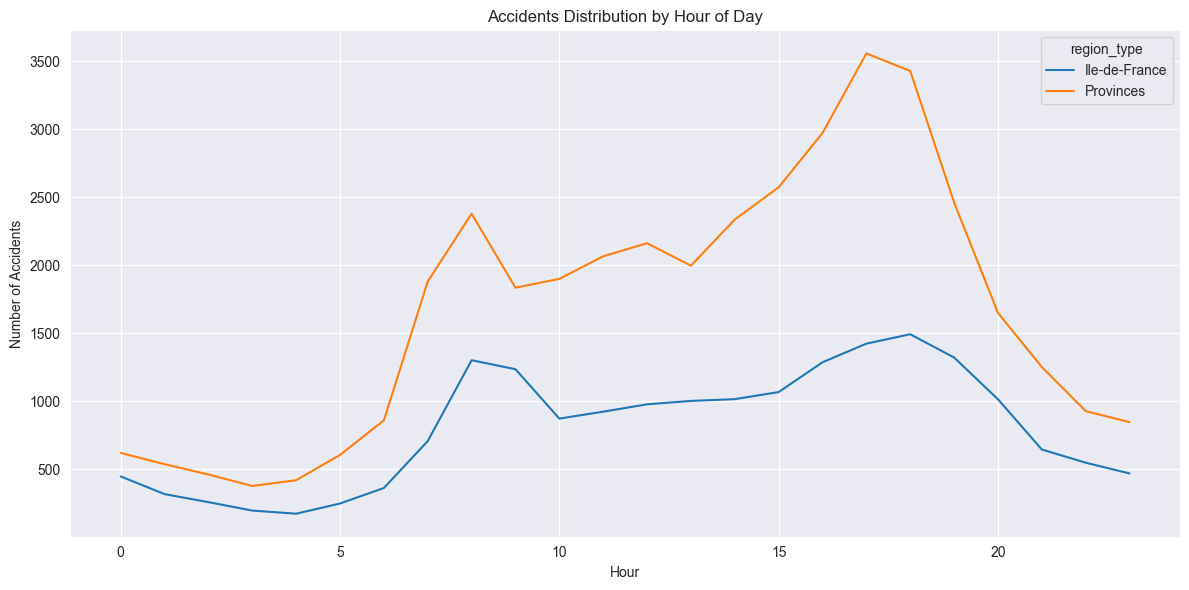

In [124]:
hourly_distribution = data.groupby(['region_type', 'hour']).size().unstack()

hourly_distribution.transpose().plot(kind='line', figsize=(12, 6))
plt.title('Accidents Distribution by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.show()

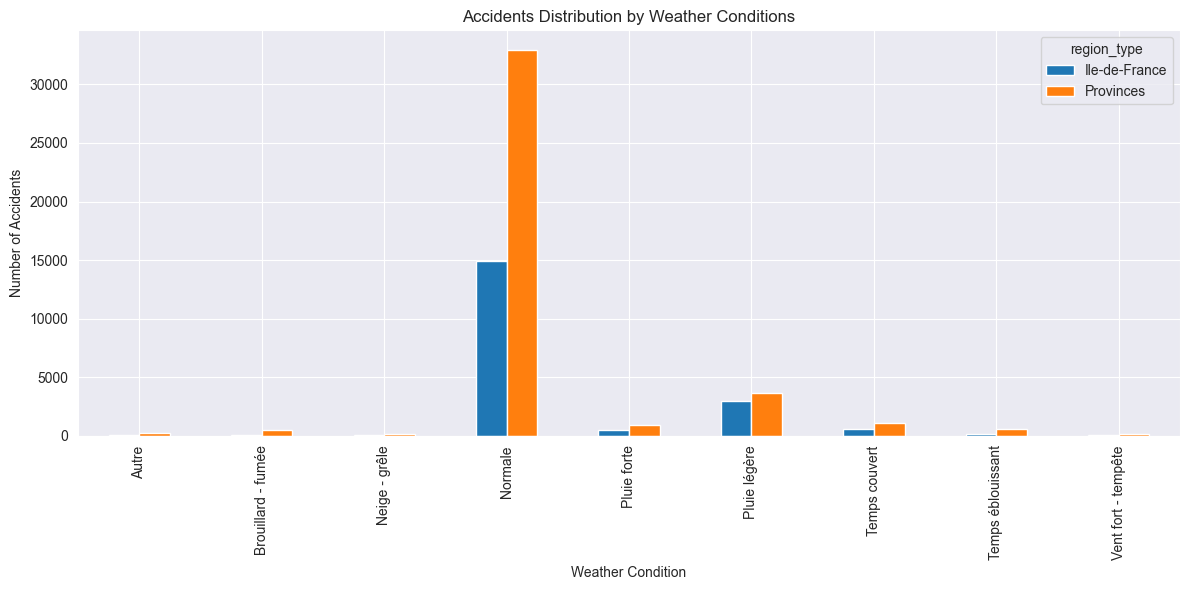

In [125]:
weather_distribution = data.groupby(['region_type', 'weather_label']).size().unstack()

weather_distribution.transpose().plot(kind='bar', figsize=(12, 6))
plt.title('Accidents Distribution by Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()


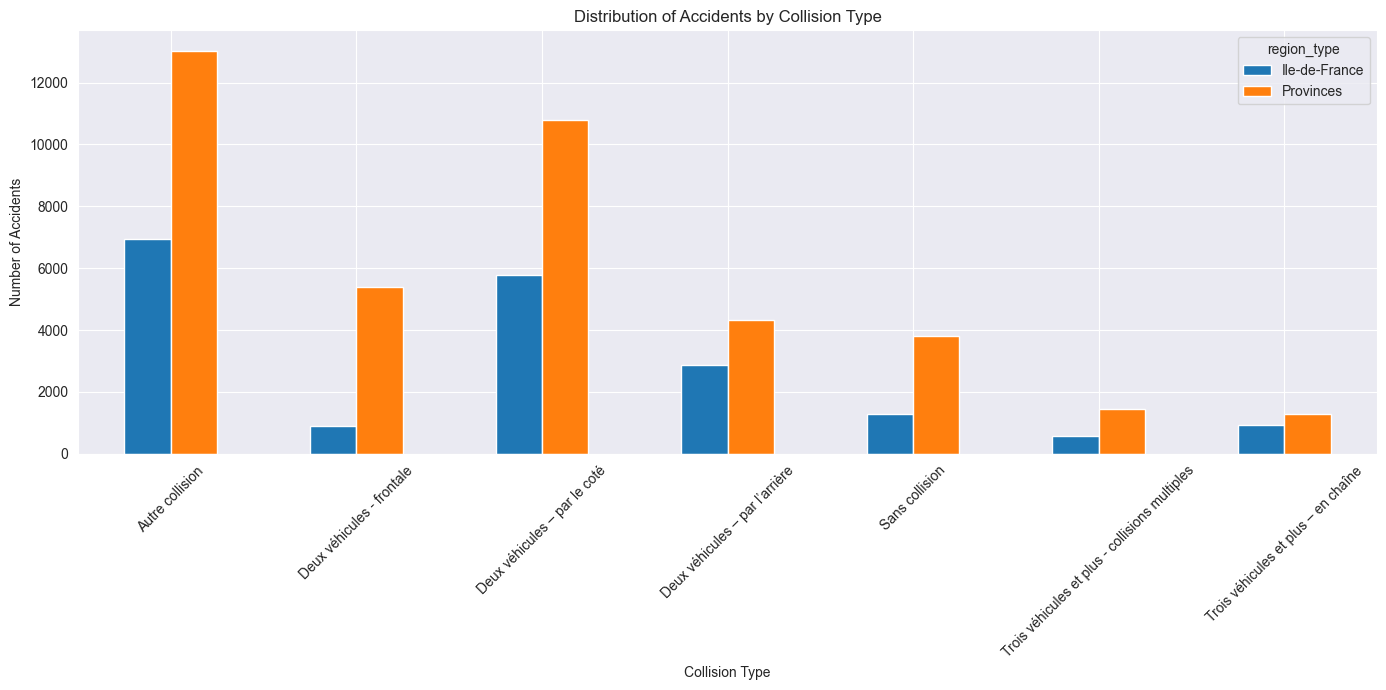

In [129]:
collision_mapping = {
    -1: 'Non renseigné',
    1: 'Deux véhicules - frontale',
    2: 'Deux véhicules – par l’arrière',
    3: 'Deux véhicules – par le coté',
    4: 'Trois véhicules et plus – en chaîne',
    5: 'Trois véhicules et plus - collisions multiples',
    6: 'Autre collision',
    7: 'Sans collision'
}

# Map the collision type codes to their descriptive labels
data['collision_type_label'] = data['col'].map(collision_mapping)

# Group the data by region_type and collision_type_label, then count the number of accidents
collision_distribution = data.groupby(['region_type', 'collision_type_label']).size().unstack()

# Visualize the distribution of accidents by collision type for both regions
collision_distribution.transpose().plot(kind='bar', figsize=(14, 7))
plt.title('Distribution of Accidents by Collision Type')
plt.xlabel('Collision Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 8) Create a new column representing 4 period of the day. Morning, afternoon, evening, night. Use this new column to analyze any correlations with other columns. Present your results in one or more graphs.

In [131]:
def classify_period(hour):
    if 6 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 16:
        return 'Afternoon'
    elif 17 <= hour <= 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to the 'hour' column to create 'period_of_day'
data['period_of_day'] = data['hour'].apply(classify_period)


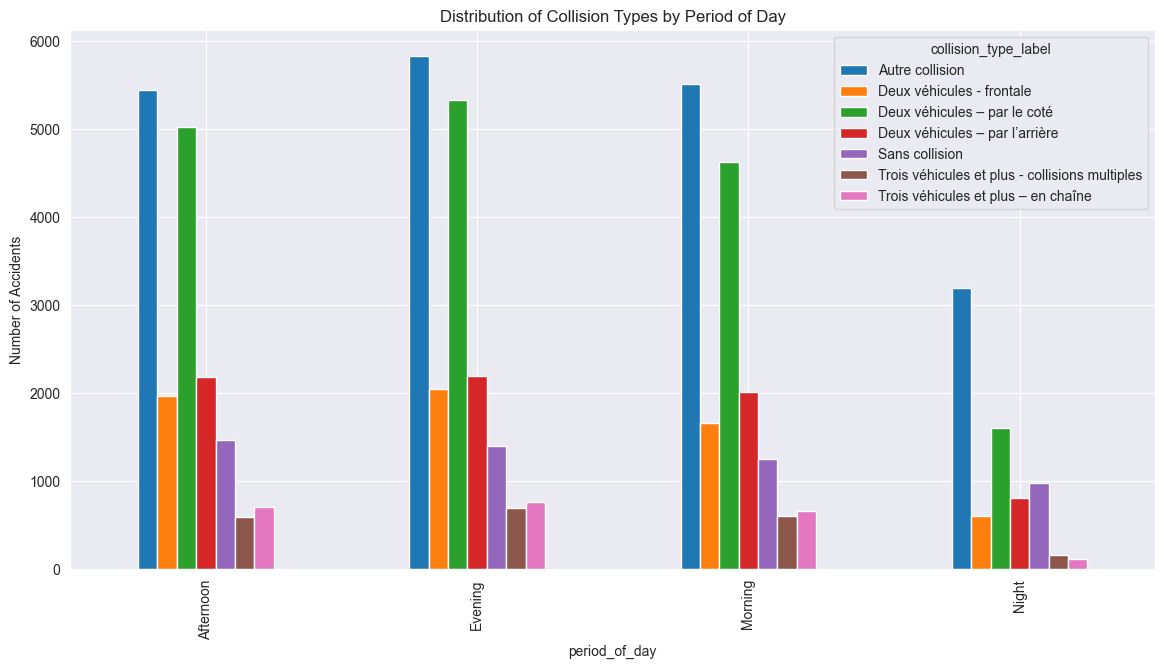

In [132]:
collision_period_distribution = data.groupby(['period_of_day', 'collision_type_label']).size().unstack()
collision_period_distribution.plot(kind='bar', figsize=(14, 7))
plt.title('Distribution of Collision Types by Period of Day')
plt.ylabel('Number of Accidents')
plt.show()

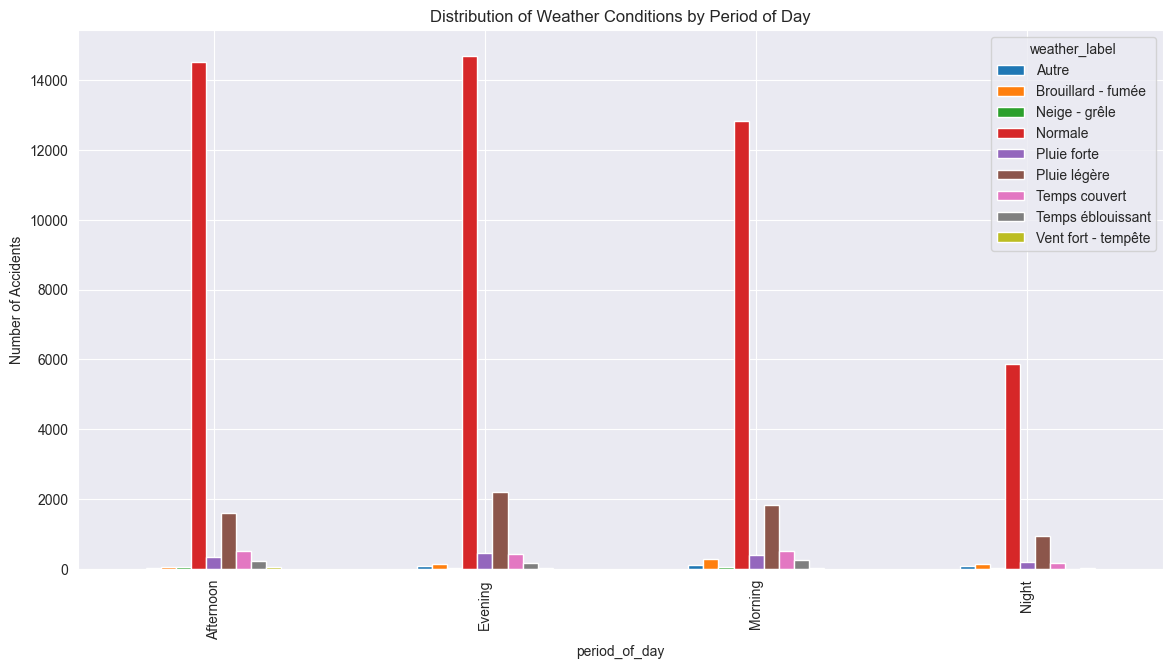

In [133]:
weather_period_distribution = data.groupby(['period_of_day', 'weather_label']).size().unstack()
weather_period_distribution.plot(kind='bar', figsize=(14, 7))
plt.title('Distribution of Weather Conditions by Period of Day')
plt.ylabel('Number of Accidents')
plt.show()

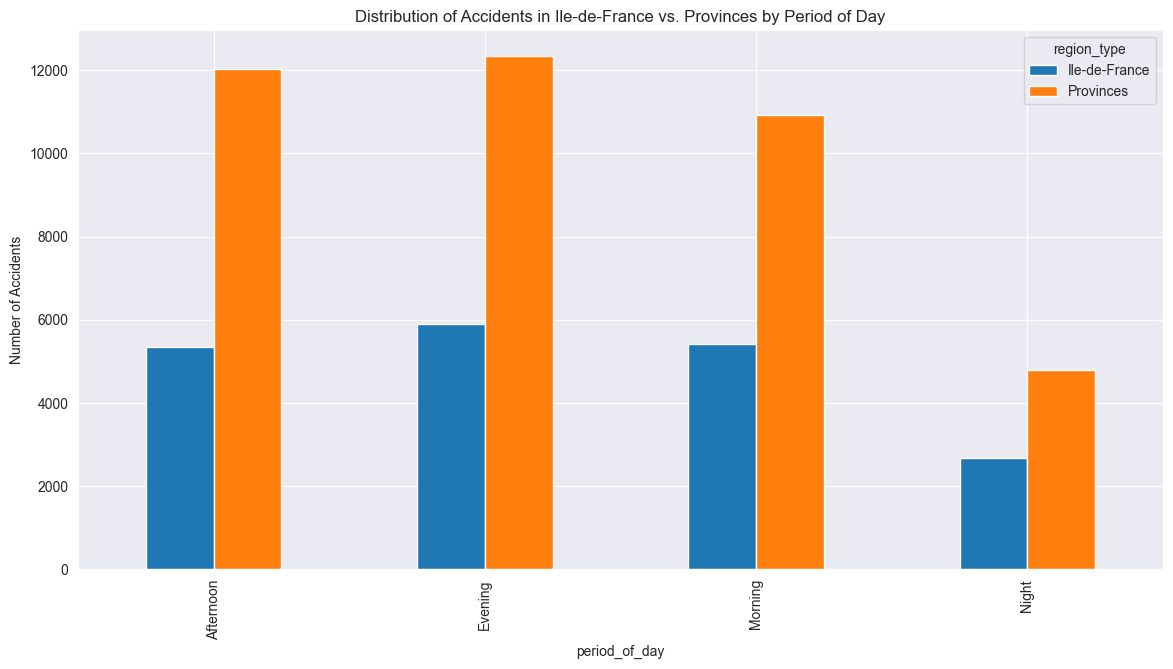

In [134]:
region_period_distribution = data.groupby(['period_of_day', 'region_type']).size().unstack()
region_period_distribution.plot(kind='bar', figsize=(14, 7))
plt.title('Distribution of Accidents in Ile-de-France vs. Provinces by Period of Day')
plt.ylabel('Number of Accidents')
plt.show()